**UE22MA242A: Mathematics for Computer Science Engineers**

Python tutorial: Linear Regression

By:- Archishman VB (TA-MCSE)

# Linear Regression

Linear regression predicts the relationship between two variables by assuming they have a straight-line connection. It finds the best line that minimizes the differences between predicted and actual values. Used in fields like economics and finance, it helps analyze and forecast data trends. Linear regression can also involve several variables (multiple linear regression) or be adapted for yes/no questions (logistic regression).

In a simple linear regression, there is one independent variable and one dependent variable. The model estimates the slope and intercept of the line of best fit, which represents the relationship between the variables. The slope represents the change in the dependent variable for each unit change in the independent variable, while the intercept represents the predicted value of the dependent variable when the independent variable is zero.

Linear regression is a quiet and the simplest statistical regression technique used for predictive analysis in machine learning. It shows the linear relationship between the independent(predictor) variable i.e. X-axis and the dependent (output) variable i.e. Y-axis, called linear regression. If there is a single input variable X (independent variable), such linear regression is simple linear regression.


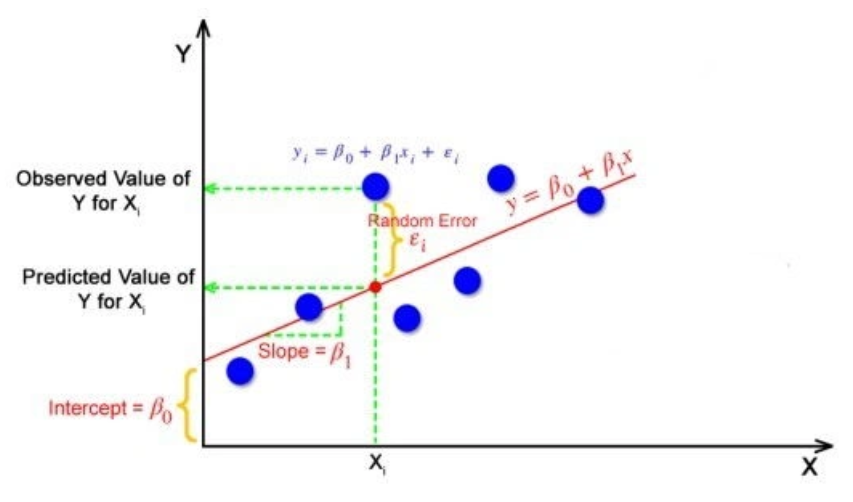


To calculate best-fit line linear regression uses a traditional slope-intercept form which is given below,

Y i =  β 0 + β 1 X i

where Y i  = Dependent variable,  β 0  = constant/Intercept, β 1  = Slope/Intercept, X i  = Independent variable.

This algorithm explains the linear relationship between the dependent(output) variable y and the independent(predictor) variable X using a straight line  Y= B 0 + B 1 X.

The goal of the linear regression algorithm is to get the best values for B 0 and B 1 to find the best-fit line. The best-fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.


# Cost Funtion and Gradient Descent

The cost function helps to work out the optimal values for B 0  and B 1 , which provides the best-fit line for the data points.

In Linear Regression, generally Mean Squared Error (MSE) cost function is used, which is the average squared error that occurred between the y predicted and y i.

We calculate MSE using the simple linear equation y=mx+b:


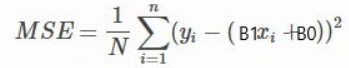


Using the MSE function, we’ll update the values of B 0  and B 1  such that the MSE value settles at the minima.  These parameters can be determined using the gradient descent method such that the value for the cost function is minimum.


**Gradient Descent** is one of the optimization algorithms that optimize the cost function (objective function) to reach the optimal minimal solution. To find the optimum solution, we need to reduce the cost function (MSE) for all data points. This is done by updating the values of the slope coefficient (B1) and the constant coefficient (B0) iteratively until we get an optimal solution for the linear function.

cost funtion J:

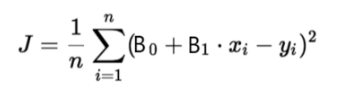



Parameter update formulae:

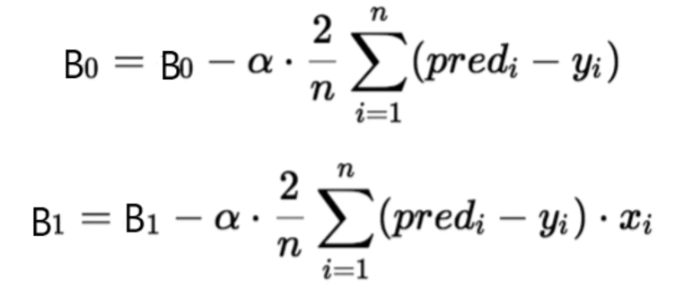

We need to minimize the cost function J. One of the ways to achieve this is to apply the batch gradient descent algorithm. In batch gradient descent, the values are updated in each iteration. (The above two equations show the updating of values)

The partial derivates are the gradients, and they are used to update the values of B 0 and B 1. Alpha is the learning rate.




**Assignment**

For this assignment, we will use Linear regression to predict the 'Close' price of 'Apple' stock. The data will be imported directly from yahoo finance using their library.

The task is to implement the 'linear_regression' funtion using gradient descent algorithm to optimize and update the parameters.

In [ ]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## for this assignment, we will use yfinance library to directly import the stock data.

In [ ]:
# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.

    Parameters:
    ticker (str): Stock ticker symbol (e.g., 'AAPL')
    start_date (str): Start date for the stock data in 'YYYY-MM-DD' format
    end_date (str): End date for the stock data in 'YYYY-MM-DD' format

    Returns:
    DataFrame: Historical stock data with columns like Open, High, Low, Close, Volume
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

In [ ]:
# Load dataset for Apple stock (AAPL)
df = fetch_stock_data('AAPL', '2015-01-01', '2023-01-01')

# Display the first few rows of the dataset


# Preprocess the data (Drop missing values)


In [ ]:
# Feature Selection (Using Open, High, Low, Volume as features and Close as target)
X = df[['Open', 'High', 'Low', 'Volume']].values  # Convert to numpy array
y = df['Close'].values  # Convert to numpy array

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X_scaled to account for the intercept (bias term)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Split data into training and testing sets (80% for training, 20% for testing)
split_idx = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [ ]:
# ---- Assignment Part ----

# Implement the linear_regression function using Gradient Descent

def linear_regression(X, y, learning_rate=0.0001, iterations=1000):
    """
    This function implements the linear regression model using Gradient Descent.

    Parameters:
    X (numpy array): The input feature matrix (with intercept term)
    y (numpy array): The target variable
    learning_rate (float): The learning rate for Gradient Descent (default is 0.01)
    iterations (int): The number of iterations for Gradient Descent (default is 1000)

    Returns:
    theta (numpy array): The model parameters (weights)
    cost_history (list): History of the cost function value at each iteration
    """
      # Number of training examples
      # Initialize model parameters (weights-'theta')
    cost_history = []  # To store the cost function values at each iteration

    # Gradient Descent loop
    for _ in range(iterations):
        # Make predictions


        # Compute the error (residuals)


        # Compute the gradient


        # Update the model parameters


        # Calculate the cost (Mean Squared Error) and append to cost_history


    return theta, cost_history

In [ ]:
# Call the function to train the model
theta, cost_history = linear_regression(X_train, y_train, learning_rate=0.0001, iterations=1000)

# Make predictions on the test set
y_pred = X_test.dot(theta)

# ---- Model Evaluation ----

# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to calculate R-squared
def r2_score(y_true, y_pred):
    total_variance = np.var(y_true)
    unexplained_variance = np.var(y_true - y_pred)
    return 1 - (unexplained_variance / total_variance)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

In [ ]:
# ---- Visualization ----

# Plot actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Plot the cost history to show the convergence of Gradient Descent
plt.figure(figsize=(10,6))
plt.plot(range(len(cost_history)), cost_history)
plt.title('Cost Function History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Stock Price')
plt.ylabel('Residuals')
plt.show()

**Question**: In the gradient descent algorithm, the learning rate
𝛼
α controls how big the steps are during the parameter updates. What do you think will happen if you set the learning rate too high or too low? How would this affect the convergence of the model, and what might you observe in the cost function history plot? Explain your reasoning.
try it out with values- (0.01, 0.001, 0.0001, 0.00001)


**Question**: In this assignment, you used features such as Open, High, Low, and Volume to predict the Close price of the stock. How do you think adding or removing features could impact the accuracy of the model? Try it out, i.e run the code with only open, high, low and observe the performance metrics.


Play around with the learning rate as well as the iterations of gradient descent and observe the MSE and R2 values. Is there any dependance/relation between them?
